In [1]:
from fastai import *
from fastai.tabular import *

# Data

In [2]:
PATH = Path('../data')

In [3]:
df_train = pd.read_csv(PATH/'train.csv')

In [4]:
df_test = pd.read_csv(PATH/'test.csv')

## Train

In [5]:
df_train.head()

,Дата рейса,Рейс,А/П отправл,А/П прибыт,Номер ВС,Время отправления по расписанию,Время отправления фактическое,Время прибытия по расписанию,Время прибытия фактическое,1 КЗ Код,Задержка отправления в минутах
0,2015-10-27 00:00:00,387,SVO,HAV,127,2015-10-27 07:40:00,2015-10-27 07:36:00,2015-10-27 20:45:00,2015-10-27 20:57:00,NaN,0.0
1,2015-10-27 00:00:00,1,SVO,JFK,235,2015-10-27 09:50:00,2015-10-27 09:52:00,2015-10-27 20:35:00,2015-10-27 20:39:00,03.608,2.0
2,2015-10-27 00:00:00,37,SVO,MIA,194,2015-10-27 10:45:00,2015-10-27 10:41:00,2015-10-27 23:35:00,2015-10-27 23:23:00,NaN,0.0
3,2015-10-27 00:00:00,29,SVO,LAX,196,2015-10-27 12:30:00,2015-10-27 12:24:00,2015-10-28 01:20:00,2015-10-28 01:07:00,NaN,0.0
4,2015-10-27 00:00:00,671,OTP,SVO,18,2015-10-27 14:15:00,2015-10-27 14:24:00,2015-10-27 16:40:00,2015-10-27 17:10:00,55,9.0


In [6]:
df_train.rename(index=str, columns={
    'Дата рейса': 'flight_time',
    'Рейс': 'flight_id',
    'А/П отправл': 'departure_airport',
    'А/П прибыт': 'arrival_airport',
    'Номер ВС': 'plane_id',
    'Время отправления по расписанию': 'scheduled_departure_time',
    'Время отправления фактическое': 'departure_time',
    'Время прибытия по расписанию': 'scheduled_arrival_time',
    'Время прибытия фактическое': 'arrival_time',
    '1 КЗ Код': 'code',
    'Задержка отправления в минутах': 'delay'
}, inplace=True)

In [7]:
add_datepart(df_train, "scheduled_departure_time", drop=False, time=True)
add_datepart(df_train, "scheduled_arrival_time", drop=False, time=True)

In [8]:
date_features = [
    'scheduled_departure_time',
    'scheduled_arrival_time',
]

In [9]:
df_train.head()

,flight_time,flight_id,departure_airport,arrival_airport,plane_id,scheduled_departure_time,departure_time,scheduled_arrival_time,arrival_time,code,...,scheduled_arrival_timeIs_month_end,scheduled_arrival_timeIs_month_start,scheduled_arrival_timeIs_quarter_end,scheduled_arrival_timeIs_quarter_start,scheduled_arrival_timeIs_year_end,scheduled_arrival_timeIs_year_start,scheduled_arrival_timeHour,scheduled_arrival_timeMinute,scheduled_arrival_timeSecond,scheduled_arrival_timeElapsed
0,2015-10-27 00:00:00,387,SVO,HAV,127,2015-10-27 07:40:00,2015-10-27 07:36:00,2015-10-27 20:45:00,2015-10-27 20:57:00,NaN,...,False,False,False,False,False,False,20,45,0,1445978700
1,2015-10-27 00:00:00,1,SVO,JFK,235,2015-10-27 09:50:00,2015-10-27 09:52:00,2015-10-27 20:35:00,2015-10-27 20:39:00,03.608,...,False,False,False,False,False,False,20,35,0,1445978100
2,2015-10-27 00:00:00,37,SVO,MIA,194,2015-10-27 10:45:00,2015-10-27 10:41:00,2015-10-27 23:35:00,2015-10-27 23:23:00,NaN,...,False,False,False,False,False,False,23,35,0,1445988900
3,2015-10-27 00:00:00,29,SVO,LAX,196,2015-10-27 12:30:00,2015-10-27 12:24:00,2015-10-28 01:20:00,2015-10-28 01:07:00,NaN,...,False,False,False,False,False,False,1,20,0,1445995200
4,2015-10-27 00:00:00,671,OTP,SVO,18,2015-10-27 14:15:00,2015-10-27 14:24:00,2015-10-27 16:40:00,2015-10-27 17:10:00,55,...,False,False,False,False,False,False,16,40,0,1445964000


In [10]:
dateparts = ['Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Hour', 'Minute', 'Second']

In [11]:
date_features_datepart = [feature + datepart for feature in date_features for datepart in dateparts]

In [12]:
df_train['row_index'] = range(0, len(df_train))

## Test

In [13]:
df_test.rename(index=str, columns={
    'Дата рейса': 'flight_time',
    'Рейс': 'flight_id',
    'А/П отправл': 'departure_airport',
    'А/П прибыт': 'arrival_airport',
    'Номер ВС': 'plane_id',
    'Время отправления по расписанию': 'scheduled_departure_time',
    'Время прибытия по расписанию': 'scheduled_arrival_time',
}, inplace=True)

In [14]:
df_test.head()

,flight_time,flight_id,departure_airport,arrival_airport,plane_id,scheduled_departure_time,scheduled_arrival_time
0,2018-09-01 00:00:00,250,SVO,ARH,96,2018-09-01 00:05:00,2018-09-01 01:55:00
1,2018-09-01 00:00:00,325,SVO,CEK,81,2018-09-01 00:05:00,2018-09-01 02:30:00
2,2018-09-01 00:00:00,554,SVO,GYD,119,2018-09-01 00:05:00,2018-09-01 03:10:00
3,2018-09-01 00:00:00,369,SVO,ABA,138,2018-09-01 00:10:00,2018-09-01 04:45:00
4,2018-09-01 00:00:00,606,SVO,AKX,125,2018-09-01 00:15:00,2018-09-01 02:40:00


In [15]:
add_datepart(df_test, "scheduled_departure_time", drop=False, time=True)
add_datepart(df_test, "scheduled_arrival_time", drop=False, time=True)

In [16]:
date_features = [
    'scheduled_departure_time',
    'scheduled_arrival_time',
]

In [17]:
df_test.head()

,flight_time,flight_id,departure_airport,arrival_airport,plane_id,scheduled_departure_time,scheduled_arrival_time,scheduled_departure_timeYear,scheduled_departure_timeMonth,scheduled_departure_timeWeek,...,scheduled_arrival_timeIs_month_end,scheduled_arrival_timeIs_month_start,scheduled_arrival_timeIs_quarter_end,scheduled_arrival_timeIs_quarter_start,scheduled_arrival_timeIs_year_end,scheduled_arrival_timeIs_year_start,scheduled_arrival_timeHour,scheduled_arrival_timeMinute,scheduled_arrival_timeSecond,scheduled_arrival_timeElapsed
0,2018-09-01 00:00:00,250,SVO,ARH,96,2018-09-01 00:05:00,2018-09-01 01:55:00,2018,9,35,...,False,True,False,False,False,False,1,55,0,1535766900
1,2018-09-01 00:00:00,325,SVO,CEK,81,2018-09-01 00:05:00,2018-09-01 02:30:00,2018,9,35,...,False,True,False,False,False,False,2,30,0,1535769000
2,2018-09-01 00:00:00,554,SVO,GYD,119,2018-09-01 00:05:00,2018-09-01 03:10:00,2018,9,35,...,False,True,False,False,False,False,3,10,0,1535771400
3,2018-09-01 00:00:00,369,SVO,ABA,138,2018-09-01 00:10:00,2018-09-01 04:45:00,2018,9,35,...,False,True,False,False,False,False,4,45,0,1535777100
4,2018-09-01 00:00:00,606,SVO,AKX,125,2018-09-01 00:15:00,2018-09-01 02:40:00,2018,9,35,...,False,True,False,False,False,False,2,40,0,1535769600


In [18]:
df_test['row_index'] = range(len(df_train), len(df_train) + len(df_test))

# Model

In [19]:
df_train_delay = df_train.copy()

In [20]:
delay_mean, delay_std = df_train_delay.loc[:,'delay'].mean(), df_train_delay.loc[:,'delay'].std()
df_train_delay.loc[:,'delay'] = (df_train_delay.loc[:,'delay'] - delay_mean) / (delay_std)

In [21]:
dep_var = 'delay'
cat_names = date_features_datepart + ['flight_id', 'departure_airport', 'arrival_airport', 'plane_id']
cont_names = ['scheduled_departure_timeElapsed', 'scheduled_arrival_timeElapsed', 'row_index']
procs = [FillMissing, Categorify, Normalize]

In [23]:
test_data = TabularList.from_df(df_test, path=PATH, cat_names=cat_names, cont_names=cont_names, procs=procs)

In [24]:
data = (TabularList.from_df(df_train_delay, path=PATH, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .random_split_by_pct()
                           .label_from_df(cols=dep_var, label_cls=FloatList)
                           .add_test(test_data, label=1)
                           .databunch(bs=256))

In [25]:
data.show_batch(rows=4)

scheduled_departure_timeIs_month_end,scheduled_departure_timeIs_month_start,scheduled_departure_timeIs_quarter_end,scheduled_departure_timeIs_quarter_start,scheduled_departure_timeIs_year_end,scheduled_departure_timeIs_year_start,scheduled_departure_timeYear,scheduled_departure_timeMonth,scheduled_departure_timeWeek,scheduled_departure_timeDay,scheduled_departure_timeDayofweek,scheduled_departure_timeDayofyear,scheduled_departure_timeHour,scheduled_departure_timeMinute,scheduled_departure_timeSecond,scheduled_arrival_timeIs_month_end,scheduled_arrival_timeIs_month_start,scheduled_arrival_timeIs_quarter_end,scheduled_arrival_timeIs_quarter_start,scheduled_arrival_timeIs_year_end,scheduled_arrival_timeIs_year_start,scheduled_arrival_timeYear,scheduled_arrival_timeMonth,scheduled_arrival_timeWeek,scheduled_arrival_timeDay,scheduled_arrival_timeDayofweek,scheduled_arrival_timeDayofyear,scheduled_arrival_timeHour,scheduled_arrival_timeMinute,scheduled_arrival_timeSecond,flight_id,departure_airport,arrival_airport,plane_id,scheduled_departure_timeElapsed,scheduled_arrival_timeElapsed,row_index,target
False,False,False,False,False,False,2018,1,3,15,0,15,17,25,0,False,False,False,False,False,False,2018,1,3,15,0,15,21,0,0,751,IST,SVO,166,0.8794,0.8795,0.8766,-0.22079843282699585
False,False,False,False,False,False,2017,7,29,22,5,203,15,5,0,False,False,False,False,False,False,2017,7,29,22,5,203,21,0,0,346,IKT,SVO,276,0.2892,0.2896,0.2505,-0.22079843282699585
False,False,False,False,False,False,2016,4,17,28,3,119,21,0,0,False,False,False,False,False,False,2016,4,17,28,3,119,23,15,0,273,STW,SVO,158,-1.2097,-1.2099,-1.1989,-0.22079843282699585
False,False,False,False,False,False,2016,10,42,20,3,294,15,10,0,False,False,False,False,False,False,2016,10,42,20,3,294,17,40,0,242,SVO,MMK,183,-0.6273,-0.6274,-0.6457,-0.22079843282699585


In [27]:
range_scale = 1.2
y_range = (
    float(df_train_delay['delay'].min() * range_scale),
    float(df_train_delay['delay'].max() * range_scale)
)

In [28]:
y_range

(-0.2649581187041721, 38.117187449233015)

In [29]:
def rmse(pred, targ):
    return torch.sqrt(((targ - pred)**2).mean())

In [30]:
learn = tabular_learner(data, layers=[1000, 500], ps=[0.001, 0.01], emb_drop=0.0004, y_range=y_range, metrics=[rmse])

In [31]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


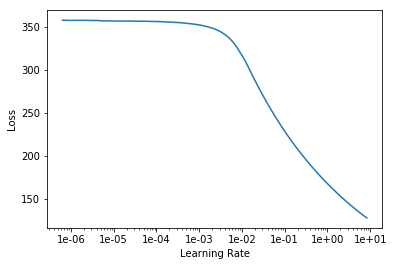

In [32]:
learn.recorder.plot(skip_end=0)

In [33]:
lr = 1e-2
wd = 1e-7

In [34]:
learn.fit_one_cycle(1, max_lr=lr, wd=wd)

epoch,train_loss,valid_loss,rmse
1,0.712871,0.819095,1.019385


In [36]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [37]:
preds

tensor([[-0.1938],
        [-0.2420],
        [-0.2064],
        ...,
        [-0.2078],
        [-0.2423],
        [-0.2447]])

In [38]:
preds = preds.numpy() * (1e-7 + delay_std) + delay_mean

In [44]:
df_sub = pd.read_csv('../data/sample_submission.csv')

In [41]:
df_sub['Задержка отправления в минутах'] = preds

In [42]:
df_sub.to_csv('../submissions/sub_23.csv', index=False)

In [45]:
df_sub = pd.read_csv('../submissions/sub_23.csv')
df_sub.head()

,index,Задержка отправления в минутах
0,0,1.213031
1,1,-0.951010
2,2,0.644921
3,3,0.988362
4,4,-0.322716
